In [1]:
# connect to colab

from google.colab import drive 
drive.mount('/content/drive')
%cd drive/
!ls

Mounted at /content/drive
/content/drive
MyDrive


In [2]:
import os 
os.chdir("/content/drive/My Drive/CNN/duygu_tanima")
!pwd

/content/drive/My Drive/CNN/duygu_tanima


## Installing related packages

Uploading the necessary modules for data preparation, visualization and training to the notebook

In [40]:
#import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras
from  tensorflow.keras.optimizers import  Adam
from  tensorflow.keras.models import Sequential, Model, model_from_json
from  tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from  tensorflow.keras.utils import load_img, img_to_array, array_to_img, to_categorical
from  tensorflow.keras.preprocessing import image_dataset_from_directory
from  tensorflow.keras.callbacks import ModelCheckpoint

# Loading the dataset

In [4]:
# Reading dataset with pandas and import to notebook
data= pd.read_csv("/content/drive/My Drive/CNN/duygu_tanima/data/fer2013.csv") 

# checking data size
data.shape

(35887, 3)

**Visualizing and examining the dataset**

In [5]:
# shows all columns and first 5 rows of dataset
data.head() 

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
# The dataset is divided into three as Training, PuplicTest and PrivateTest. Let's count them..

data["Usage"].value_counts()



Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## Train Data preprocessing

In [7]:
# Let's take the data separated as "training" in the dataset. We will carry out our training process on this data.

np.unique(data["Usage"].values.ravel())  # --np.ravel-- Return a contiguous flattened array.

train_data= data[data.Usage=="Training"]  # let's assign the training examples to another variable

train_data.shape  # let's check the number of training data

(28709, 3)

In [8]:
# In the fer2013 dataset, the pixel values in the "pixels" column were created with spaces between them. let's arrange

train_pixels= train_data.pixels.str.split(" ").tolist() # We remove the spaces and add the pixel values to the list.

train_pixels= pd.DataFrame(train_pixels, dtype= int) # let's convert the pixel list to dataframe


In [9]:
train_images = train_pixels.values #Let's assign the pixel values to a new variable

train_images = train_images.astype(np.float)  #Let's change the type of the variable

print(train_images)  #let's see the variable

print(train_images.shape)  #let's see the variable size

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


### Visualizing

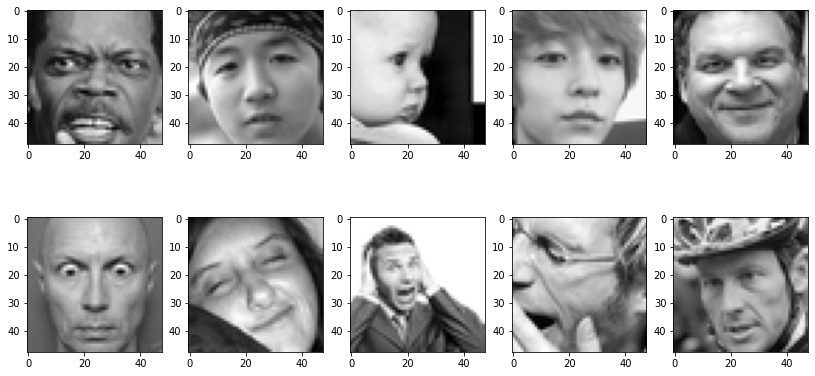

In [10]:

#edit figure size
plt.figure(figsize=(14,7))  

# Let's transform the pixel values into a 48x48 image and visualize it. 
#i used for loop to visualize top 10 data from dataset

for i in range (10):
  plt.subplot(2,5,1+i)
  plt.imshow(train_images[10+i].reshape(48,48), cmap="gray")


### Train emotion labels

In [11]:
#Let's determine how many classes are in the training set. namely different emotion labeled

train_labels_flat= train_data["emotion"].values.ravel()  #--np.ravel-- Return a contiguous flattened array.
train_labels_count= np.unique(train_labels_flat).shape[0] # how many unique labels are there
print("number of label :",train_labels_count )

number of label : 7


In [12]:
# Let's determine the class of the data in the training set with onehot.
# Let the emotion of the data be 1 and the remaining emotions be 0.

def dense_to_one_hot (labels_dense, num_classes):
  num_labels= labels_dense.shape[0]
  index_offset = np.arange(num_labels)*num_classes
  labels_one_hot= np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()]=1
  return labels_one_hot

In [13]:
# Let's determine the class values of the training data
y_train = dense_to_one_hot(train_labels_flat, train_labels_count)

y_train = y_train.astype(np.uint8)

print(y_train.shape)
print(y_train[15])

(28709, 7)
[0 0 0 0 0 1 0]


## Test Data preprocessing

we will use "PuplicTest" data to test the deep learning model

In [14]:
# Let's take the data separated as "PuplicTest" in the dataset. We will carry out our test process on this data.

np.unique(data["Usage"].values.ravel())  # --np.ravel-- Return a contiguous flattened array.

test_data= data[data.Usage=="PublicTest"]  # let's assign the test examples to another variable

test_data.shape  # let's check the number of test data

(3589, 3)

In [15]:
# In the fer2013 dataset, the pixel values in the "pixels" column were created with spaces between them. let's arrange

test_pixels= test_data.pixels.str.split(" ").tolist() # We remove the spaces and add the pixel values to the list.

test_pixels= pd.DataFrame(test_pixels, dtype= int) # let's convert the pixel list to dataframe

In [16]:
test_images = test_pixels.values #Let's assign the pixel values to a new variable

test_images = test_images.astype(np.float)  #Let's change the type of the variable

print(test_images.shape)  #let's see the variable size

(3589, 2304)


### Visualizing

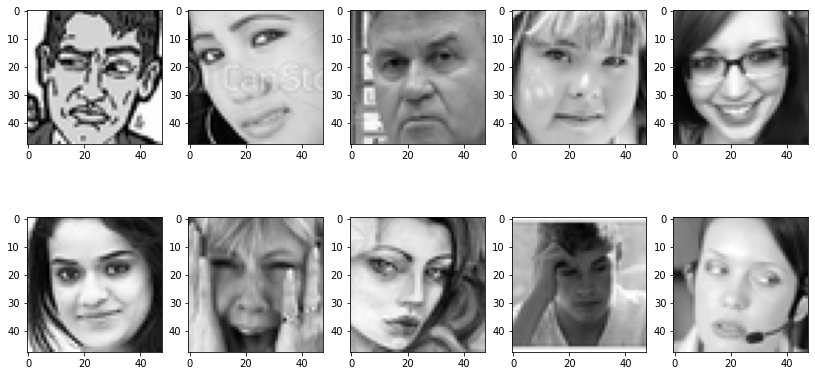

In [17]:
#edit figure size
plt.figure(figsize=(14,7))  

# Let's transform the pixel values into a 48x48 image and visualize it. 
#i used for loop to visualize top 10 data from dataset

for i in range (10):
  plt.subplot(2,5,1+i)
  plt.imshow(test_images[i].reshape(48,48), cmap="gray")

### Test emotion labels

In [18]:
#Let's determine how many classes are in the training set. namely different emotion labeled

test_labels_flat= test_data["emotion"].values.ravel()  #--np.ravel-- Return a contiguous flattened array.
test_labels_count= np.unique(test_labels_flat).shape[0] # how many unique labels are there
print("number of label :",test_labels_count )

number of label : 7


In [19]:
# Let's determine the class values of the training data
y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)
print(y_test[15])

(3589, 7)
[0 0 1 0 0 0 0]


# Creating a deep convolutional neural network model

In [20]:
from tensorflow.python.keras import activations
model= Sequential()  #Create an empty neural network model and assign it to variable "model"

# first layer

# "channels_last" corresponds to inputs with shape (batch_size, height, width, channels) 
# "input_shape: (height, width, channels)"
model.add(Conv2D(64,3, data_format="channels_last", kernel_initializer = "he_normal", input_shape= (48, 48, 1))) # filters: 64, kernel_size :3
model.add(BatchNormalization()) #Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
model.add(Activation("relu"))


# Second layer

model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=2)) #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
model.add(Dropout(0.6)) #The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.


# Third layer

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))


# Fourth layer

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))


# fifth layer

model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(Dropout(0.6))


# Full connected layers
model.add(Flatten()) #Flattens the input. Does not affect the batch size.
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))


# output layer
model.add(Dense(train_labels_count))
model.add(Activation("softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 44, 44, 64)        0

In [41]:
#compile

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999) # let's use  "Adam" optimizer and edit optimization parameters

model.compile(loss="categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"]) #loss function: "categorical_crossentropy", 

In [42]:
# Let's bring the training and test datasets into a format suitable for training and prediction operations

x_train= train_images.reshape(train_images.shape[0],48,48,1)
x_test= test_images.reshape(test_images.shape[0],48,48,1)

print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape) # number of classes
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape) # number of classes

x_train shape : (28709, 48, 48, 1)
y_train shape : (28709, 7)
x_test shape : (3589, 48, 48, 1)
y_test shape : (3589, 7)


# Traning

In [43]:
# save most successful weights ("accuracy")

checkpointer = ModelCheckpoint(filepath = "/content/drive/My Drive/CNN/duygu_tanima/data/face_model.h5", verbose=1, save_best_only=True) 
callbacks_list = [checkpointer]

# hyperparameters
epochs= 20
batch_size= 150


In [45]:
# run the model

hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batch_size,
                 validation_data=(x_test, y_test),
                 callbacks= callbacks_list,
                 verbose=1)



Epoch 1/20
192/192 [==============================] - ETA: 0s - loss: 1.7839 - accuracy: 0.2981
Epoch 00001: val_loss improved from inf to 1.61712, saving model to /content/drive/My Drive/CNN/duygu_tanima/data/face_model.h5
192/192 [==============================] - 521s 3s/step - loss: 1.7839 - accuracy: 0.2981 - val_loss: 1.6171 - val_accuracy: 0.3566
Epoch 2/20
192/192 [==============================] - ETA: 0s - loss: 1.5833 - accuracy: 0.3818
Epoch 00002: val_loss improved from 1.61712 to 1.46394, saving model to /content/drive/My Drive/CNN/duygu_tanima/data/face_model.h5
192/192 [==============================] - 513s 3s/step - loss: 1.5833 - accuracy: 0.3818 - val_loss: 1.4639 - val_accuracy: 0.4238
Epoch 3/20
192/192 [==============================] - ETA: 0s - loss: 1.4887 - accuracy: 0.4226
Epoch 00003: val_loss did not improve from 1.46394
192/192 [==============================] - 516s 3s/step - loss: 1.4887 - accuracy: 0.4226 - val_loss: 1.4926 - val_accuracy: 0.4319
Epoch

In [46]:
# save model to json
model_json = model.to_json()
with open('/content/drive/My Drive/CNN/duygu_tanima/data/face_model.json', 'w') as json_file:
  json_file.write(model_json)

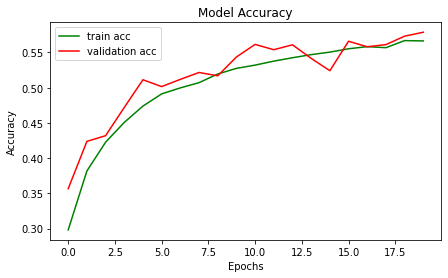

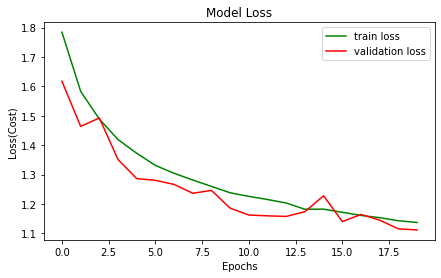

In [47]:
#visualize

plt.figure(figsize=(7,4))

plt.plot(hist.history["accuracy"], label= "train acc", color="g")
plt.plot(hist.history["val_accuracy"], label= "validation acc",color="r")
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig('face_recognition_accuracy.png')
plt.show()

plt.figure(figsize=(7,4))
plt.plot(hist.history["loss"], label= "train loss",color="g")
plt.plot(hist.history["val_loss"], label= "validation loss",color="r")
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss(Cost)")
plt.savefig('face_recognition_loss.png')
plt.show()


plt.show()

In [49]:
#Saving
model_test=model.save("/content/drive/My Drive/CNN/duygu_tanima/data/face_model.h5")

# PrivateTest

In [54]:
# We will evaluate model performance for privatetest data

test= data[["emotion","pixels"]][data["Usage"]== "PrivateTest"] #Let's specify the PrivateTest data
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring (im, sep= " ")) # --numpy.fromstring- A new 1-D array initialized from text data in a string.
test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [62]:
x_test_private = np.vstack(test["pixels"].values) # Stack arrays in sequence vertically (row wise).
y_test_private = np.array(test["emotion"]) # convert "emotion" data to array

In [64]:
# Let's convert the arrays to appropriate sizes

x_test_private = x_test_private.reshape(-1, 48,48,1) 
y_test_private = to_categorical(y_test_private) 

print("x_test_private shape :", x_test_private.shape)
print("y_test_private shape :", y_test_private.shape)

x_test_private shape : (3589, 48, 48, 1)
y_test_private shape : (3589, 7)


In [70]:
score = model.evaluate(x_test_private,y_test_private, verbose=0) # evaluating dataset

print(" PrivateTest loss: ", score[0]) # PrivateTest Loss
print(" PrivateTest Accuracy: ","%", score[1]*100, ) # PrivateTest Accuracy

 PrivateTest loss:  1.073464274406433
 PrivateTest Accuracy:  % 58.67930054664612


# Real World Samples

In [72]:
#let's load the modules to load and size the images

from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing import image

In [73]:
# we recorded the best weights obtained in the training process. 
# We will use these weights

model_best= load_model("/content/drive/My Drive/CNN/duygu_tanima/data/face_model.h5")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


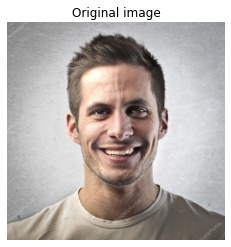

In [114]:
# let's upload face photo for emotion recognition


real_image_path= "/content/drive/My Drive/CNN/duygu_tanima/images/emotion1.jpg" #file location of image

original_image= image.load_img(real_image_path) #original image

real_image= image.load_img(real_image_path, target_size= (48,48), grayscale=True) # upload photo and convert to grayscale

real_data= image.img_to_array(real_image) # convert image to array

real_data= np.expand_dims(real_data, axis=0)  # -- np.expand_dims--Insert a new axis that will appear at the axis position in the expanded array shape.
real_data= np.vstack([real_data]) # # Stack arrays in sequence vertically (row wise).

results= model_best.predict(real_data, batch_size) #predict the image, add predictions to "results" list

plt.imshow(original_image) #Let's show you the original photo
plt.title("Original image") 
plt.axis("off")
plt.show()

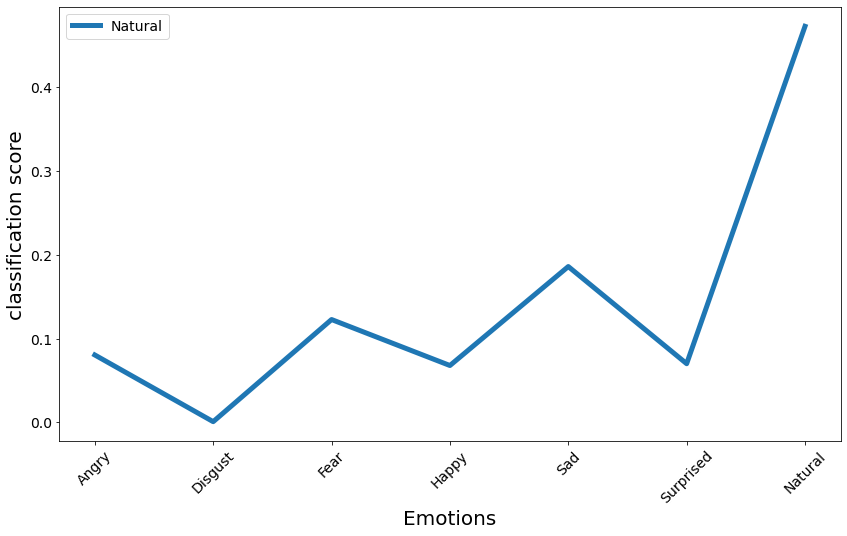

In [116]:
# Visualize

class_name=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprised", "Natural"] # emotion class names

emotion= class_name[np.argmax(results)] # highest rate emotion

plt.figure(figsize=(14,8)) # Figure size
plt.plot(class_name, results[0], label= emotion, linewidth=5, markersize=12) # draw the graph
plt.legend(fontsize=14)
plt.xlabel("Emotions", fontsize=20) # x axis name
plt.ylabel("classification score", fontsize=20) # y axis name
plt.xticks(rotation= 45, fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()



'surprised'